<a href="https://colab.research.google.com/github/sohebdatascientist1/mlproject/blob/main/functinol_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

product name is **iphone 15**

1. Meta data(tabular data)
2. description(text)
3. image (image based data)

Naive Approach:

3 seprate network and then you will give the final answer.

Functional Approach:

tabulardata    
text         
image

after taking these 3 data you will perform concatination

and then you will predict the final o/p



**simple example**

based on 3 column

salary | weight | married/status |    [age(cont),place(cat)]

In [ ]:
from keras.models import Model
from keras.layers import *

X=Input(shape=(3,))

In [ ]:
hidden1=Dense(128, activation='relu')(X)

hidden2=Dense(64,activation='relu')(hidden1)


output1=Dense(1,activation="linear")(hidden2)

output2=Dense(1,activation="sigmoid")(hidden2)


In [ ]:
model=Model(inputs = X ,outputs = [output1,output2])

In [ ]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 3)]                  0         []                            
                                                                                                  
 dense_4 (Dense)             (None, 128)                  512       ['input_3[0][0]']             
                                                                                                  
 dense_5 (Dense)             (None, 64)                   8256      ['dense_4[0][0]']             
                                                                                                  
 dense_6 (Dense)             (None, 1)                    65        ['dense_5[0][0]']             
                                                                                            

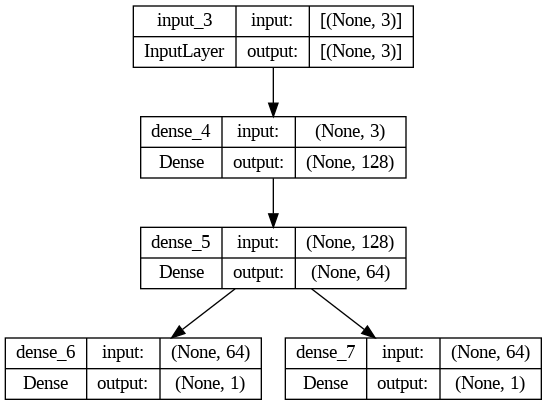

In [ ]:
from keras.utils import plot_model

plot_model(model,show_shapes=True)

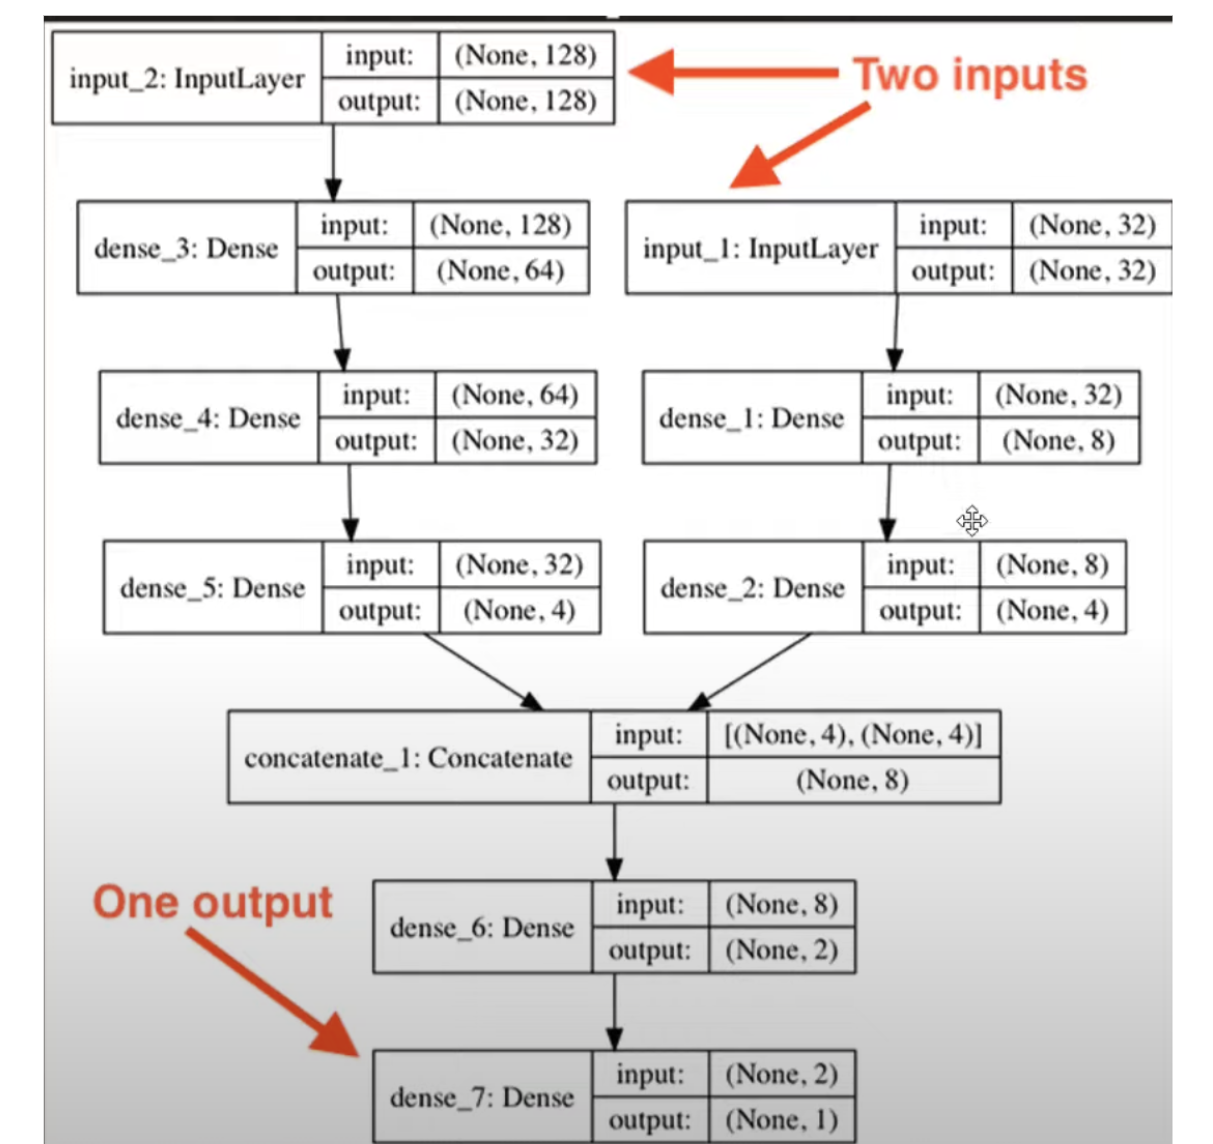

In [ ]:
InputA=Input(shape=(32,))
InputB=Input(shape=(128,))

# i will creat a branch for input A

X=Dense(8, activation="relu")(InputA)
X1=Dense(4,activation="relu")(X)


In [ ]:
#create a branch for the inputB

y=Dense(64,activation="relu")(InputB)

y1=Dense(32,activation="relu")(y)

y2=Dense(4,activation="relu")(y1)

In [ ]:
combinedvalue=concatenate([X1,y2])

In [ ]:
Z=Dense(2,activation="relu")(combinedvalue)
z1 = Dense(1, activation="linear")(Z)

In [ ]:
model=Model(inputs=[InputA,InputB],outputs=z1)

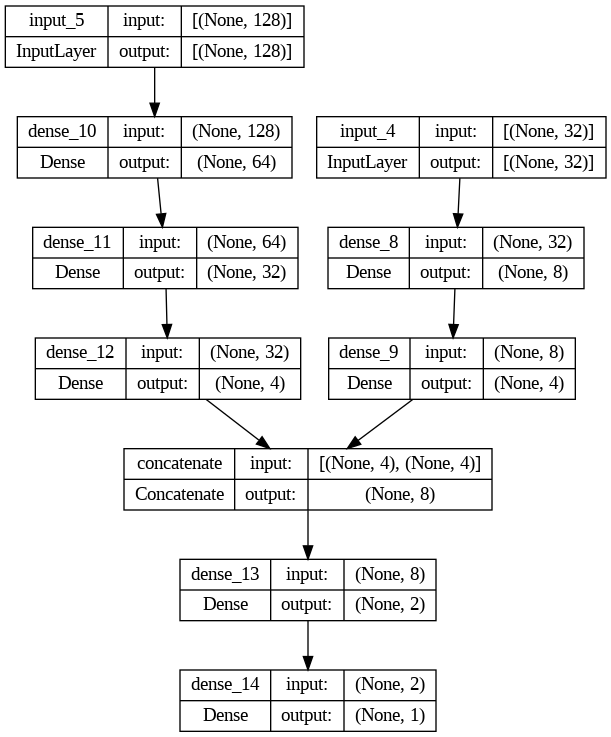

In [ ]:
from keras.utils import plot_model

plot_model(model,show_shapes=True)

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d jangedoo/utkface-new

 97% 321M/331M [00:04<00:00, 34.0MB/s]
100% 331M/331M [00:04<00:00, 73.2MB/s]


In [ ]:
PATH="/content/utkface-new.zip"

import zipfile
zip=zipfile.ZipFile(PATH,"r")
zip.extractall("/content")
zip.close()

In [ ]:
folder_path="/content/utkface_aligned_cropped/UTKFace"

In [ ]:
file="39_0_1_20170117165839076.jpg.chip.jpg"

In [ ]:
int(file.split("_")[0])

39

In [ ]:
int(file.split("_")[1])

0

In [ ]:
import os
age=[]
gender=[]
img_path=[]


for file in os.listdir(folder_path):
  age.append(int(file.split("_")[0]))

  gender.append(int(file.split("_")[1]))

  img_path.append(file)

In [ ]:
len(age)

23708

In [ ]:
import pandas as pd
dataframe=pd.DataFrame({"age":age,"gender":gender,"img":img_path})

In [ ]:
dataframe

,age,gender,img
0,29,0,29_0_1_20170113134817225.jpg.chip.jpg
1,26,0,26_0_4_20170117200626708.jpg.chip.jpg
2,48,1,48_1_0_20170110152853674.jpg.chip.jpg
3,22,1,22_1_4_20161221195925096.jpg.chip.jpg
4,42,0,42_0_0_20170117154810113.jpg.chip.jpg
...,...,...,...
23703,31,0,31_0_0_20170104201545729.jpg.chip.jpg
23704,22,1,22_1_2_20170116172702296.jpg.chip.jpg
23705,1,0,1_0_2_20170117195243732.jpg.chip.jpg
23706,34,0,34_0_1_20170117010115390.jpg.chip.jpg


In [ ]:
dataframe.sample(frac=1,random_state=0)

,age,gender,img
15426,35,0,35_0_2_20170117191008778.jpg.chip.jpg
14084,26,1,26_1_2_20170116184100913.jpg.chip.jpg
22319,90,0,90_0_0_20170111205428761.jpg.chip.jpg
19518,2,1,2_1_2_20161219155732445.jpg.chip.jpg
2255,3,1,3_1_3_20161219230521112.jpg.chip.jpg
...,...,...,...
13123,67,0,67_0_0_20170120224536320.jpg.chip.jpg
19648,14,0,14_0_2_20170103201051263.jpg.chip.jpg
9845,26,1,26_1_2_20170116171202584.jpg.chip.jpg
10799,21,1,21_1_4_20161223225837372.jpg.chip.jpg


In [ ]:
train=dataframe.sample(frac=1,random_state=0).iloc[:20000]

In [ ]:
test=dataframe.sample(frac=1,random_state=0).iloc[20000:]

In [ ]:
train.shape

(20000, 3)

In [ ]:
test.shape

(3708, 3)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=30,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)



test_datagen = ImageDataGenerator(rescale=1./255)



In [ ]:
train_generator=train_datagen.flow_from_dataframe(train,
                                              directory=folder_path,
                                              x_col='img',
                                              y_col=['age','gender'],
                                              target_size=(200,200),
                                              class_mode='multi_output')


test_generator=test_datagen.flow_from_dataframe(test,
                                            directory=folder_path,
                                            x_col='img',
                                            y_col=['age','gender'],
                                            target_size=(200,200),
                                            class_mode='multi_output')

Found 20000 validated image filenames.
Found 3708 validated image filenames.


In [ ]:
from keras.applications.resnet50 import ResNet50
from keras.layers import *
from keras.models import Model

In [ ]:
resnet=ResNet50(include_top=False, input_shape=(200,200,3))

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
resnet.trainable=False

In [ ]:
output=resnet.layers[-1].output

In [ ]:
flatten=Flatten()(output)

dense1 = Dense(512, activation='relu')(flatten)
dense2 = Dense(512, activation='relu')(flatten)

dense3 = Dense(512,activation='relu')(dense1)
dense4 = Dense(512,activation='relu')(dense2)

output1 = Dense(1,activation='linear',name='age')(dense3)
output2 = Dense(1,activation='sigmoid',name='gender')(dense4)

In [ ]:
model=Model(inputs=resnet.input,outputs=[output1,output2])

In [ ]:
model.compile(optimizer='adam',loss={"age":"mse","gender":'binary_crossentropy'}, metrics={'age': 'mae', 'gender': 'accuracy'})

In [ ]:
model.fit(train_generator,batch_size=32,epochs=2,validation_data=test_generator)

Epoch 1/2
282/625 [============>.................] - ETA: 2:05 - loss: 415.8590 - age_loss: 414.8183 - gender_loss: 1.0407 - age_mae: 15.7329 - gender_accuracy: 0.4983